In [0]:
#Initializing libraries and modules

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Getting data file

!wget https://git.imp.fu-berlin.de/guilleg96/ifabi-2019/raw/master/Project_Week1/processed.cleveland.data -p drive/content
df = pd.read_csv("/content/processed.cleveland.data")
df.info()


--2019-10-26 16:33:55--  https://git.imp.fu-berlin.de/guilleg96/ifabi-2019/raw/master/Project_Week1/processed.cleveland.data
Resolving git.imp.fu-berlin.de (git.imp.fu-berlin.de)... 160.45.117.96
Connecting to git.imp.fu-berlin.de (git.imp.fu-berlin.de)|160.45.117.96|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://git.imp.fu-berlin.de/users/sign_in [following]
--2019-10-26 16:33:56--  https://git.imp.fu-berlin.de/users/sign_in
Reusing existing connection to git.imp.fu-berlin.de:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘git.imp.fu-berlin.de/guilleg96/ifabi-2019/raw/master/Project_Week1/processed.cleveland.data’

git.imp.fu-berlin.d     [ <=>                ]  10.76K  --.-KB/s    in 0s      

2019-10-26 16:33:56 (206 MB/s) - ‘git.imp.fu-berlin.de/guilleg96/ifabi-2019/raw/master/Project_Week1/processed.cleveland.data’ saved [11015]

Loading robots.txt; please ignore errors.
--2019-10-26 16:33:56--

In [3]:
#adding column names/indexes
columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df=pd.read_csv(r"/content/processed.cleveland.data",sep=',',names=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
#Clean incomplete data rows

for col in columns:
  df[col] = df[col].replace("?", np.nan)

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
target      297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [5]:
#Convert values to numeric datasets

for col in columns:
  df[col] = pd.to_numeric(df[col], downcast = 'integer')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int8
sex         297 non-null int8
cp          297 non-null int8
trestbps    297 non-null int16
chol        297 non-null int16
fbs         297 non-null int8
restecg     297 non-null int8
thalach     297 non-null int16
exang       297 non-null int8
oldpeak     297 non-null float64
slope       297 non-null int8
ca          297 non-null int8
thal        297 non-null int8
target      297 non-null int8
dtypes: float64(1), int16(3), int8(10)
memory usage: 9.3 KB


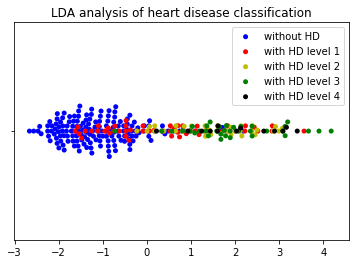

In [6]:
#LINEAR DISCRIMINANT ANALYSIS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA(n_components=1)

y = df["target"].values
X = clf.fit(df[df.columns[:-1]].values, y).transform(df[df.columns[:-1]].values)
X = X[:, 0]

sns.swarmplot(X[y == 0], color="b", label="without HD")
sns.swarmplot(X[y == 1], color="r", label="with HD level 1")
sns.swarmplot(X[y == 2], color="y", label="with HD level 2")
sns.swarmplot(X[y == 3], color="g", label="with HD level 3")
sns.swarmplot(X[y == 4], color="k", label="with HD level 4")
plt.title("LDA analysis of heart disease classification")
plt.legend()

In [7]:
#Calculate correlations to get the more correlated variables with heart disease.

corr = df.corr()['target'].abs().sort_values()
corr

fbs         0.049040
chol        0.066448
trestbps    0.159620
restecg     0.184136
age         0.222156
sex         0.226797
slope       0.374689
exang       0.391613
cp          0.404248
thalach     0.420639
oldpeak     0.501461
thal        0.513377
ca          0.521178
target      1.000000
Name: target, dtype: float64

In [8]:
#Count values to determine which of them are ENUM-LIKE FEATURES. Those will have to be hot-one encoded

for col in columns:
  col = df[col].value_counts()
  print (col)

58    18
57    17
54    16
59    14
51    12
60    12
62    11
44    11
52    11
56    11
64    10
41    10
67     9
63     9
65     8
61     8
42     8
55     8
45     8
46     7
50     7
43     7
53     7
66     7
48     7
47     5
49     5
39     4
70     4
35     4
68     4
69     3
40     3
71     3
34     2
37     2
77     1
38     1
76     1
74     1
29     1
Name: age, dtype: int64
1    201
0     96
Name: sex, dtype: int64
4    142
3     83
2     49
1     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
160    11
138    10
125    10
128    10
112     9
132     7
118     7
124     6
135     6
108     6
145     5
134     5
152     5
122     4
170     4
100     4
115     3
142     3
105     3
136     3
126     3
180     3
102     2
94      2
144     2
146     2
178     2
148     2
129     1
164     1
101     1
174     1
104     1
172     1
106     1
165     1
114     1
158     1
192     1
156     1
117     1
155     1
154     1
123     1
200     1
Name: 

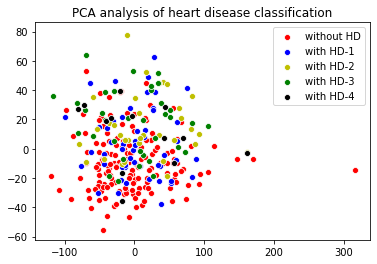

In [9]:
##########################
#PREPROCESSING OF THE DATA

#Encoding the enum-like features.

enum = {
    'cp':4,
    'thal':3,
    'exang':2,
    'restecg':3,
    'ca':4
}

for feat in enum:
  one_hot = pd.get_dummies(df[feat])
  new_col = []
  for i in range(enum[feat]):
    new_col.append(str(feat)+'-'+str(i+1))
  #print (new_col)
  one_hot.columns = new_col
  df = df.join(one_hot)
  df.drop(feat, axis = 1)

  
#Look for outliers with principle component analysis.
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
data_cols = [col for col in df.columns if col != "target"]
X = df[data_cols]
y = df["target"]
X_trans = clf.fit(X, y).transform(X)
sns.scatterplot(X_trans[y == 0][:, 0], X_trans[y == 0][:, 1], color="r", label="without HD")
sns.scatterplot(X_trans[y == 1][:, 0], X_trans[y == 1][:, 1], color="b", label="with HD-1")
sns.scatterplot(X_trans[y == 2][:, 0], X_trans[y == 2][:, 1], color="y", label="with HD-2")
sns.scatterplot(X_trans[y == 3][:, 0], X_trans[y == 3][:, 1], color="g", label="with HD-3")
sns.scatterplot(X_trans[y == 4][:, 0], X_trans[y == 4][:, 1], color="k", label="with HD-4")


plt.title("PCA analysis of heart disease classification")
plt.legend()


#Looking in the plot, we find outliers at X>150 and Y>50
  


In [10]:
#############################
######CLASSIFIER MODELS######
#############################

######
#LINEAR REGRESSION MODEL

from sklearn.model_selection import train_test_split
Features=df.drop("target", axis=1).values
x=Features
y=df['target'].values#TargetLabel

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

from sklearn.linear_model import LogisticRegression

lrmodel=LogisticRegression()
lrmodel.fit(x_train, y_train)

predictedvalues = lrmodel.predict(x_test)

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))

print("RMSE value for Linear regression is", lrmodelrmse)

print(lrmodel.score(x_train,y_train))
print(lrmodel.score(x_test,y_test))

RMSE value for Linear regression is 1.27148207485071
0.7046413502109705
0.5666666666666667


In [11]:
############
#SVC MODEL

from sklearn.svm import SVC
svm=SVC(kernel="linear",C=0.025,random_state=101)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

from sklearn.metrics import mean_squared_error
svmmodelrmse = np.sqrt(mean_squared_error(y_pred, y_test))

from sklearn.metrics import accuracy_score

print("RMSE value for SVM is", svmmodelrmse)

print(accuracy_score(y_test,y_pred))

RMSE value for SVM is 1.0723805294763609
0.6333333333333333


In [12]:
##################
#NAIVE BAYES MODEL

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))

print("Naive bayes data is", lrmodelrmse)

print(nb.score(x_train,y_train), "trained data")
print(nb.score(x_test,y_test),"accuracy")

Naive bayes data is 1.27148207485071
0.4641350210970464 trained data
0.35 accuracy


In [13]:
############################
#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101,max_features = None, min_samples_leaf=15)
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)


from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))

print("Decision Tree data is", lrmodelrmse)

print(dtree.score(x_train,y_train), "trained data")
print(dtree.score(x_test,y_test),"accuracy")


Decision Tree data is 1.27148207485071
0.6624472573839663 trained data
0.6 accuracy


In [14]:
#########################
#RANDOM FOREST MODEL 1

from sklearn.ensemble import RandomForestClassifier
rfm= RandomForestClassifier (n_estimators=70, oob_score=True, n_jobs=-1, random_state=101,max_features=None,min_samples_leaf=30)
rfm.fit(x_train,y_train)
y_pred=rfm.predict(x_test)

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))

print("RandomForestClassifier is", lrmodelrmse)

print(rfm.score(x_train,y_train), "trained data")
print(rfm.score(x_test,y_test),"accuracy")

RandomForestClassifier is 1.27148207485071
0.620253164556962 trained data
0.55 accuracy


In [15]:
################################
#K-NEIGHBORS CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))

print("RandomForestClassifier is", lrmodelrmse)

print(knn.score(x_train,y_train), "trained data")
print(knn.score(x_test,y_test),"accuracy")

RandomForestClassifier is 1.27148207485071
0.5569620253164557 trained data
0.5666666666666667 accuracy
